In [1]:
import sys
sys.path.append('..')

import torch
from torch.nn import BCELoss, BCEWithLogitsLoss
from torch.optim import Adam
from torchvision.models import resnet18

from lib.models import SimpleClassifier, ResNet
from lib.trainer import Trainer
from lib.utils import train_parse_args, get_data_loaders
from lib.constants import HYPERPARAMETERS

In [2]:
params = HYPERPARAMETERS
params['batch_size'] = 8
params['n_epochs'] = 100
params['verbose'] = True
params['version'] = 0.11

if not params['disable_cuda'] and torch.cuda.is_available():
    params['device'] = torch.device('cuda:0')
else:
    params['device'] = torch.device('cpu')
    
for p in params:
    print(f"{p} : \t{params[p]}")

batch_size : 	8
checkpoints_dir : 	/home/sergevkim/git/FacesClassification/checkpoints
checkpoint_filename : 	
disable_cuda : 	False
imgs_dir : 	/home/sergevkim/git/FacesClassification/data/CelebaHQ
label : 	Male
labels_filename : 	/home/sergevkim/git/FacesClassification/data/list_attr_celeba.txt
logs_dir : 	/home/sergevkim/git/FacesClassification/logs
n_epochs : 	100
n_imgs : 	30000
verbose : 	True
version : 	0.9
device : 	cuda:0


In [3]:
from lib.models import get_resnet
from lib.utils import log_grad_norm


loaders = get_data_loaders(
    imgs_dir=params['imgs_dir'],
    labels_filename=params['labels_filename'],
    batch_size=params['batch_size'],
    n_imgs=params['n_imgs'])

model = get_resnet()
#model.fc.register_backward_hook(log_grad_norm)
model.cuda()

optimizer = Adam(model.parameters(), lr=1e-4)
criterion = BCEWithLogitsLoss()
trainer = Trainer(params, model, optimizer, criterion)

trainer.run(loaders)

0 0.5
100 0.625
200 0.5
300 0.5
! 0.578
EPOCH 1
1 0 0.7182236875045209
1 100 -0.3729818547774535
1 200 -6.018241926654144
1 300 -2.2161474048020353
1 400 -4.058696143784938
1 500 -12.122317037324587
1 600 4.16663832111449
1 700 6.06657505046166
1 800 -13.632905006396076
1 900 -1.740934610362829
1 1000 8.545748949050909
1 1100 18.08574867248535
1 1200 19.350126266479492
1 1300 -0.48509979248046875
1 1400 -13.056615352630615
1 1500 -20.13062739372127
1 1600 16.917868614196777
1 1700 -42.16692352294922
1 1800 -18.25312900543213
1 1900 0.04745054244995117
1 2000 -21.5413761138916
1 2100 -43.71460723876953
1 2200 -42.145856857299805
1 2300 -3.023432731628418
1 2400 -27.7099609375
1 2500 -28.073405265808105
1 2600 -71.48394393920898
1 2700 -21.72610092163086
1 2800 -32.50049114227295
1 2900 -34.770705223083496
1 3000 -70.90999031066895
1 3100 -64.39882183074951
1 3200 -2.393622398376465
1 3300 -35.706790924072266
0 0.5
100 0.625
200 0.5
300 0.5
! 0.578
Epoch time: -1257.1949265003204
EPOCH 2

KeyboardInterrupt: 

In [ ]:
loaders = get_data_loaders(
    imgs_dir=params['imgs_dir'],
    labels_filename=params['labels_filename'],
    batch_size=params['batch_size'],
    n_imgs=params['n_imgs'])

model = ResNet()
model.cuda()

optimizer = Adam(model.parameters(), lr=3e-4)
#criterion = BCELoss()
trainer = Trainer(params, model, optimizer, criterion)

trainer.run(loaders)

<class 'numpy.ndarray'>
torch.Size([1, 3, 1024, 1024])
tensor([[-0.3473]], device='cuda:0', grad_fn=<AddmmBackward>)


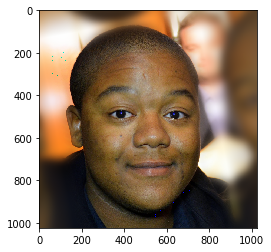

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor


a = np.array(Image.open("data/CelebaHQ/10.png"))
print(type(a))
plt.imshow(a)
a = ToTensor()(a).cuda()
a = a[np.newaxis, ...]
print(a.shape)


print(model(a))

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from scipy.linalg import norm

a = np.array([-1, 1, 1])
b = np.array([-3., -4., 2.])

b = normalize(b[..., np.newaxis])
print(b)

accuracy_score(a, b, normalize=True)

[[-1.]
 [-1.]
 [ 1.]]


0.6666666666666666

In [4]:
model = get_resnet()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import torch 
a = torch.ones(5)
a.requires_grad = True

b = 2*a

b.retain_grad()   # Since b is non-leaf and it's grad will be destroyed otherwise.

c = b.mean()

c.backward()

print(a.grad, b.grad)

# Redo the experiment but with a hook that multiplies b's grad by 2. 
a = torch.ones(5)

a.requires_grad = True

b = 2*a

b.retain_grad()

b.register_hook(lambda x: print('!', x))  
print(123)
b.mean().backward() 
print(456)
print(a.grad, b.grad)